In [24]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt




In [25]:
results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')
goalscorers = pd.read_csv('goalscorers.csv')
print(results.columns)
print(shootouts.columns)
print(goalscorers.columns)


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')
Index(['date', 'home_team', 'away_team', 'winner', 'first_shooter'], dtype='object')
Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')


In [26]:
print(results.head())

         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  


In [27]:
results.shape

(48335, 9)

In [28]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48335 entries, 0 to 48334
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48335 non-null  object
 1   home_team   48335 non-null  object
 2   away_team   48335 non-null  object
 3   home_score  48335 non-null  int64 
 4   away_score  48335 non-null  int64 
 5   tournament  48335 non-null  object
 6   city        48335 non-null  object
 7   country     48335 non-null  object
 8   neutral     48335 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [29]:
results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')
#results['year'] = results['date'].dt.year
results.date.head()

0   1872-11-30
1   1873-03-08
2   1874-03-07
3   1875-03-06
4   1876-03-04
Name: date, dtype: datetime64[ns]

In [ ]:
#Join results with shootouts for later analysis.
#Changed the date column in results to datetime format

conn = sqlite3.connect('your_database.db')
results.to_sql('results', conn, if_exists='replace', index=False)
shootouts.to_sql('shootouts', conn, if_exists='replace', index=False)


results_join = """SELECT *
FROM results
LEFT JOIN shootouts
ON results.date = shootouts.date;
"""

df_results_join = pd.read_sql_query(results_join, conn)
print(df_results_join.head())
conn.close()


                  date home_team away_team  home_score  away_score tournament  \
0  1872-11-30 00:00:00  Scotland   England           0           0   Friendly   
1  1873-03-08 00:00:00   England  Scotland           4           2   Friendly   
2  1874-03-07 00:00:00  Scotland   England           2           1   Friendly   
3  1875-03-06 00:00:00   England  Scotland           2           2   Friendly   
4  1876-03-04 00:00:00  Scotland   England           3           0   Friendly   

      city   country  neutral  date home_team away_team winner first_shooter  
0  Glasgow  Scotland        0  None      None      None   None          None  
1   London   England        0  None      None      None   None          None  
2  Glasgow  Scotland        0  None      None      None   None          None  
3   London   England        0  None      None      None   None          None  
4  Glasgow  Scotland        0  None      None      None   None          None  


In [31]:
print(df_results_join.tail(15))

                      date     home_team    away_team  home_score  away_score  \
48320  2025-06-10 00:00:00   South Korea       Kuwait           4           0   
48321  2025-06-10 00:00:00        Jordan         Iraq           0           1   
48322  2025-06-10 00:00:00     Palestine         Oman           1           1   
48323  2025-06-10 00:00:00      China PR      Bahrain           1           0   
48324  2025-06-10 00:00:00         Japan    Indonesia           6           0   
48325  2025-06-10 00:00:00  Saudi Arabia    Australia           1           2   
48326  2025-06-10 00:00:00   Netherlands        Malta           8           0   
48327  2025-06-10 00:00:00       Finland       Poland           2           1   
48328  2025-06-10 00:00:00    San Marino      Austria           0           4   
48329  2025-06-10 00:00:00       Romania       Cyprus           2           0   
48330  2025-06-10 00:00:00        Serbia      Andorra           3           0   
48331  2025-06-10 00:00:00  

In [45]:
# Create a new SQLite connection and dataframe using the results and shootouts tables with only matches from FIFA World Cup matches.
conn = sqlite3.connect('your_database.db')
results.to_sql('results', conn, if_exists='replace', index=False)
shootouts.to_sql('shootouts', conn, if_exists='replace', index=False)


results_WC = """SELECT results.date AS match_date,
    results.home_team,
    results.away_team,
    results.home_score,
    results.away_score,
    results.tournament
FROM results
LEFT JOIN shootouts
ON results.date = shootouts.date
WHERE results.tournament = 'FIFA World Cup';
"""

df_WC = pd.read_sql_query(results_WC, conn)
print(df_WC.head())

conn.close()

#convert the date column to datetime
df_WC['match_date'] = pd.to_datetime(df_WC['match_date'], errors='coerce')

            match_date  home_team      away_team  home_score  away_score  \
0  1930-07-13 00:00:00    Belgium  United States           0           3   
1  1930-07-13 00:00:00     France         Mexico           4           1   
2  1930-07-14 00:00:00     Brazil     Yugoslavia           1           2   
3  1930-07-14 00:00:00       Peru        Romania           1           3   
4  1930-07-15 00:00:00  Argentina         France           1           0   

       tournament  
0  FIFA World Cup  
1  FIFA World Cup  
2  FIFA World Cup  
3  FIFA World Cup  
4  FIFA World Cup  


In [ ]:
#

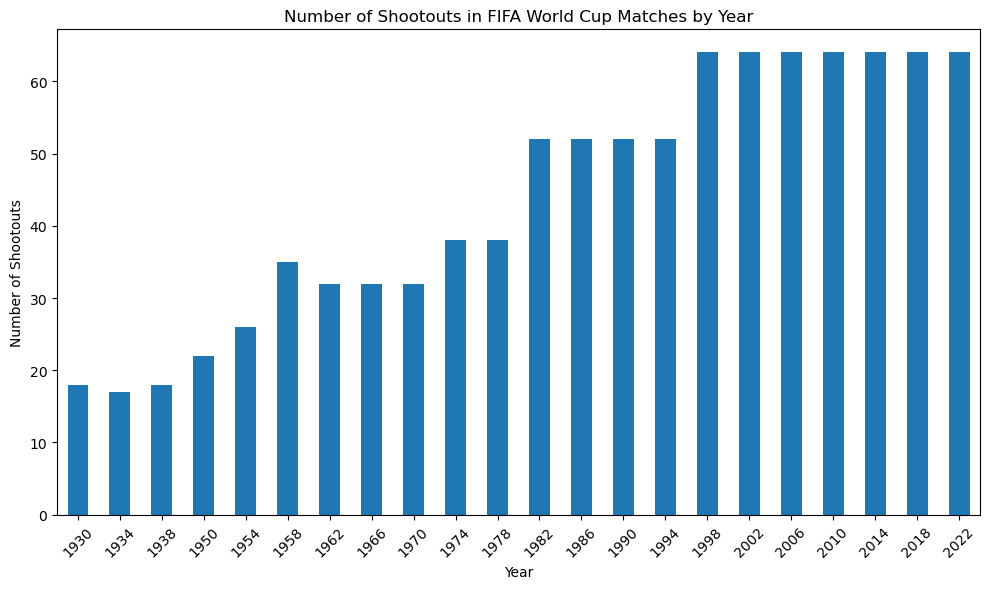

In [ ]:
#df_WC is a joined table of shootouts and results that only include World Cup matches



# Bar graph plotting the number of shootouts per year in World Cup matches.
df_WC['year'] = df_WC['match_date'].dt.year
plt.figure(figsize=(10, 6))
df_WC['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Shootouts in FIFA World Cup Matches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootouts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('shootouts_per_year.png')
plt.show()